In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
import graphviz

In [22]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X_train.shape

(120, 4)

In [24]:
clf = DecisionTreeClassifier()
clf2 = LogisticRegression()
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)
y_preds = clf.predict(X_test)
y_preds2 = clf2.predict(X_test)

In [25]:
print('------------classification report for Decision Trees---------------')
print(classification_report(y_test,y_preds))
print('------------classification report for Logistic Regression---------------')
print(classification_report(y_test,y_preds2))

------------classification report for Decision Trees---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

------------classification report for Logistic Regression---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [27]:
params = {'criterion' : ['gini','entropy'],
          'max_depth': [None, 2, 4, 6, 8],
          'max_features':[1,2],
          'max_leaf_nodes': [None, 4, 16, 20, 30],
          'min_impurity_decrease': [0.0, 0.01, 0.08, 0.3],
          'splitter' : ['best','random']}

In [28]:
clf_gcv = GridSearchCV(estimator = clf, param_grid = params, cv = 10, verbose = 2, n_jobs=-1)
clf_gcv.fit(X_train,y_train)
y_preds_gcv = clf_gcv.predict(X_test)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [29]:
print('------------classification report for Decision Trees---------------')
print(classification_report(y_test,y_preds_gcv))
print('------------Best Parameters---------------')
print(clf_gcv.best_params_)

------------classification report for Decision Trees---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

------------Best Parameters---------------
{'criterion': 'gini', 'max_depth': 6, 'max_features': 2, 'max_leaf_nodes': 16, 'min_impurity_decrease': 0.0, 'splitter': 'best'}


In [30]:
data_tree = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled= True)
graph = graphviz.Source(data_tree, format ='png')

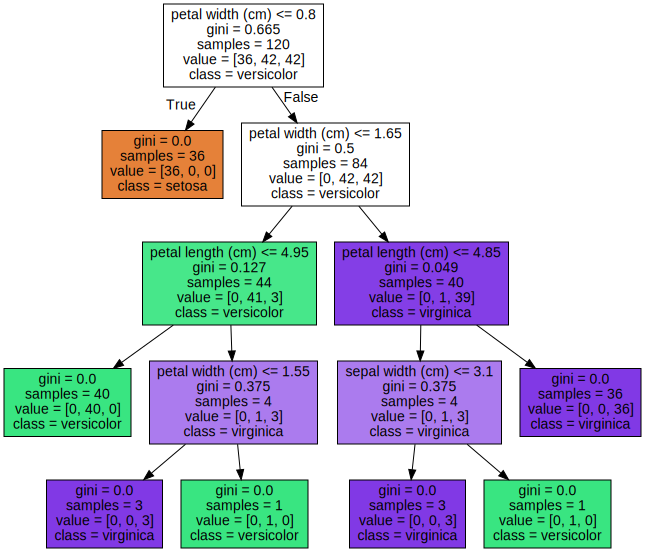

In [31]:
graph

In [34]:
!pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67935 sha256=6f2dba71ccc9c06c77e9dcb4190c22f9ec6392448297a7451ee233a063f4ad6a
  Stored in directory: c:\users\91700\appdata\local\pip\cache\wheels\53\2c\23\156e13a0e7aad1b2fef5f5566d227829565a112e3dc1a59c0d
Successfully built dtreeviz


In [35]:
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

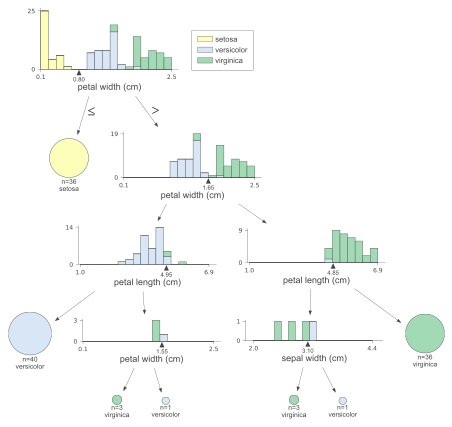

In [36]:
viz = dtreeviz(clf, X_train, y_train, feature_names=iris.feature_names, class_names=['setosa','versicolor','virginica'])
viz